<a href="https://colab.research.google.com/github/evansemet/Jane-Street-Solutions/blob/main/2022_05_Robot_Updated_Swimming_Trials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Three things to note before I write out my solution:




1.   S(n, k) denotes the sterling number of the second kind
2.   ‘Open’ refers to a race in which no robots have devoted 100% of their fuel to. In other words, no robot that is using the discrete strategy chooses to assign its fuel to that race
3.   In a nash equilibrium, our odds of winning aren’t any different if we know the strategy of other players regardless of what we do. In a size n = 8, we will be the 24th robot and thus we know the strategy of the other 23 robots.

So the first thing I’m going to do is define two functions:

We know the probability of there being exactly x robots using the discrete strategy based on the value of p using a binomial distribution:

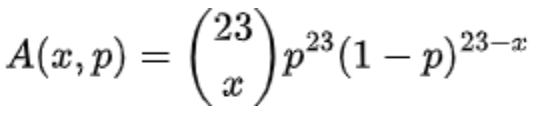

We know the probability of there being exactly k races ‘open’ given that there are exactly x robots using the discrete strategy by:
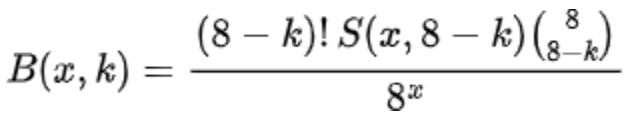

Now, this should be enough information to solve the problem. We are going to have our robot playing the non-discrete strategy and we need this probability of winning to be as close to ⅓ as we can get with 6 sig figs. The only way that we can win is if there is at least 1 race that is open. This next part I may not do the best job of explaining, but I will give two examples, and then hopefully my formula will make sense. If there is one race open and there is one other robot using the non-discrete strategy then we have a ½ chance of winning (since one of us will be chosen randomly) multiplied by the chance that there was only one other person playing non-discrete and there was exactly one race open. Take another case where there are two other players playing non-discrete and there are four races open, our chance of moving on is 1 multiplied by the chance that there were exactly two other players playing non-discrete and there are exactly four races open.

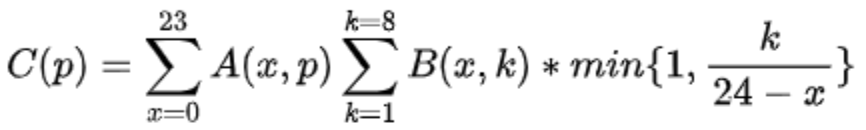

Also, I know that the only case where there can be exactly 8 races open (k = 8) occurs when every single player is playing non-discrete (x = 0), but it still needs to be there.

This yields a value of P being about 0.999561





In [ ]:
from scipy.special import comb
import math

In [ ]:
# function for the sterling number of the second kind
def S(n, k):
  sum = 0
  for j in range(k + 1):
    sum += (-1) ** (k - j) * comb(k, j) * j ** n
  return sum // math.factorial(k)


# the probability that there are exactly numOpen races open given that there are
# numDiscrete players playing discrete
def probOpen(numDiscrete, numOpen):
  return math.factorial(8 - numOpen) * S(numDiscrete, 8 - numOpen) * comb(8, 8 - numOpen) / 8 ** numDiscrete


# the probability that there are exactly numDiscrete players playing discrete
# given the probability (p) that they play discrete
def probDiscrete(numDiscrete, p):
  return comb(23, numDiscrete) * p ** 23 * (1 - p) ** (23 - numDiscrete)


# odds of winning playing non-discretely
def solve(p):
  sum = 0
  for numDiscrete in range(24):
    for numOpen in range(9):
      sum += probDiscrete(numDiscrete, p) * probOpen(numDiscrete, numOpen) * min(1, numOpen / (24 - numDiscrete))
  return sum


# this is a check since the October Puzzle solution was asking what the odds
# of winning were given that every other player was guarenteed to play discrete
print("1:", solve(1))


# loop to run through to find the value of p that yields a probability closest to 1/3
diffs = []
for p in range(999999, 999000, -1):
  if 0.33331 < solve(p / 1000000) < 0.3334:
    print(p / 1000000, "  ", solve(p / 1000000), abs(solve(p / 1000000) - 1 / 3))
    diffs.append(abs(solve(p / 1000000) - 1 / 3))
diffs.sort()
print(diffs)
print(diffs[0])

1: 0.3345783257995789
0.999584    0.3333989307511273 6.559741779399442e-05
0.999583    0.3333961014215201 6.276808818678203e-05
0.999582    0.33339327211946407 5.993878613075321e-05
0.999581    0.33339044284495917 5.710951162585243e-05
0.99958    0.3333876135980045 5.4280264671191514e-05
0.999579    0.3333847843786 5.1451045266659445e-05
0.999578    0.3333819551867453 4.8621853411978666e-05
0.999577    0.33337912602244035 4.5792689107038154e-05
0.999576    0.33337629688568415 4.296355235083871e-05
0.999575    0.33337346777647675 4.013444314343584e-05
0.999574    0.33337063869481764 3.7305361484329946e-05
0.999573    0.33336780964070706 3.4476307373743076e-05
0.999572    0.3333649806141438 3.164728081050949e-05
0.999571    0.3333621516151278 2.8818281794462663e-05
0.99957    0.33335932264365875 2.5989310325436055e-05
0.999569    0.3333564936997368 2.3160366403485177e-05
0.999568    0.3333536647833607 2.0331450027388787e-05
0.999567    0.33335083589453063 1.7502561197313415e-05
0.999566 